In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
plot_params = {
    'text.latex.preamble' : r'\usepackage{amsmath}',
    'text.usetex'         : True,
    'font.family'         : 'sans-serif',
    'font.sans-serif'     : ['Helvetica']   
}
plt.rcParams.update(plot_params)
from matplotlib import cm
from scipy.optimize import brentq
from scipy.misc import derivative

In [18]:
E0,p,a = sp.symbols('E_0 p a',real=True,positive=True)
x,y,z = sp.symbols('x y z',real=True)

r = sp.sqrt(x**2 + y**2 + z**2)
V = E0*z*(1+a**3/2/r**3)/(1-p**3)

Ex = -sp.diff(V,x)
Ey = -sp.diff(V,y)
Ez = -sp.diff(V,z)

Ex = Ex.subs(x,x*a).subs(y,y*a).subs(z,z*a)
Ey = Ey.subs(x,x*a).subs(y,y*a).subs(z,z*a)
Ez = Ez.subs(x,x*a).subs(y,y*a).subs(z,z*a)

In [32]:
((2*(1-p**3)/3/E0)*Ex).simplify()

x*z/(x**2 + y**2 + z**2)**(5/2)

In [40]:
def get_E(x,y,z):
    r = np.sqrt(x**2 + y**2 + z**2)
    Ex = x*z/r**5
    Ey = y*z/r**5
    Ez = z**2/r**5 - (2 + 1/r**3)/3
    return Ex,Ey,Ez

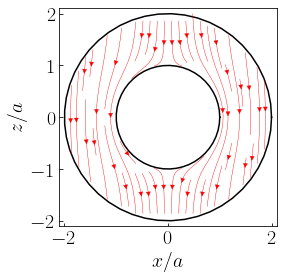

In [76]:
phi = np.linspace(0,2*np.pi)
plt.plot(np.cos(phi),np.sin(phi),'k-')
plt.plot(2*np.cos(phi),2*np.sin(phi),'k-')

t = np.linspace(-2,2,200)
X,Z = np.meshgrid(t,t)
Ex,Ey,Ez = get_E(X,np.zeros(X.shape),Z)
R = np.sqrt(X**2+Z**2)
cond = np.logical_or(R < 1, R > 2)
Ex[cond] = np.NaN
Ey[cond] = np.NaN
Ez[cond] = np.NaN
plt.streamplot(X,Z,Ex,Ez,density=1,linewidth=0.4,color='r')

plt.xlabel(r'$x/a$',size=20)
plt.ylabel(r'$z/a$',size=20)
plt.tick_params(axis='both',which='major',direction='in',labelsize=20)
plt.xlim(-2.1,2.1)
plt.ylim(-2.1,2.1)
ax = plt.gca()
ax.set_aspect('equal',adjustable='box')
plt.savefig('prob3.pdf',bbox_inches='tight')

plt.show()